# Binary classification using logistic regression

Find the category (0 or 1) given the features A and B.  
Write down your hypothesis, cost-function and use gradient-descent, and sklearn to make predictions.  

In [3]:
# necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#read the data-set
data_set = pd.read_csv('data.csv')
# preview data-set
data_set.head()

,featureA,featureB,category
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
# get more insight of the data-set
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   featureA  100 non-null    float64
 1   featureB  100 non-null    float64
 2   category  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [6]:
# check for missing values
data_set.isnull().sum()

featureA    0
featureB    0
category    0
dtype: int64

Luckily we don't have any missing values in our data-set

## Exploratory Data Analysis

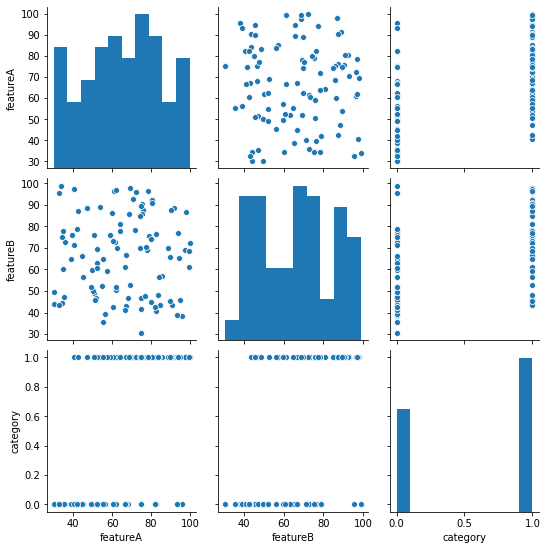

In [7]:
# create a pair plot
sns.pairplot(data_set)

<AxesSubplot:xlabel='category', ylabel='featureA'>

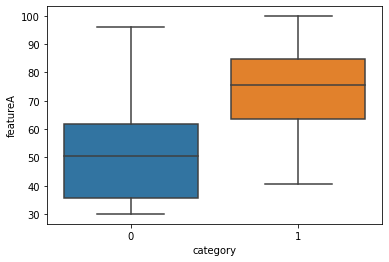

In [8]:
# box plot for featureA
sns.boxplot(x='category', y='featureA', data=data_set)

<AxesSubplot:xlabel='category', ylabel='featureB'>

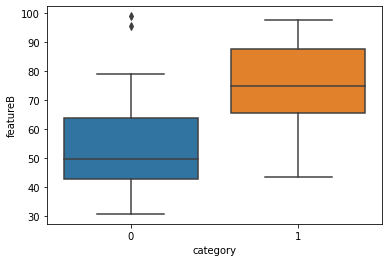

In [9]:
# box plot for featureB
sns.boxplot(x='category', y='featureB', data=data_set)

<AxesSubplot:>

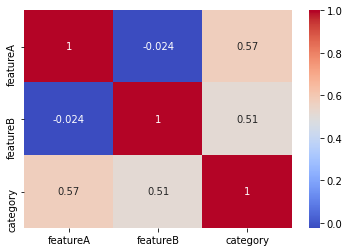

In [10]:
# correlation matrix
sns.heatmap(data_set.corr(), annot=True, cmap='coolwarm')

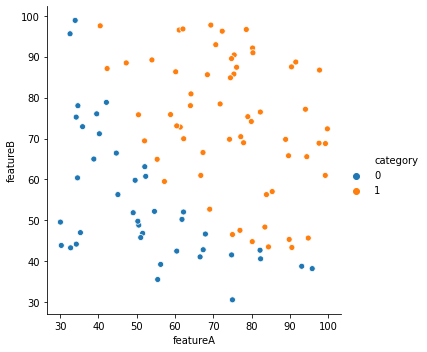

In [11]:
# look at the categorization of our data
sns.relplot(x='featureA', y='featureB', data=data_set, hue='category')

We can have a straight line fit to our data-set that can separate the category with some outliers.  
Let's fit a linear model in terms of input parameters.  

## Logistic Regression Model

Let's consider our parameters to be $\theta_0, \theta_1, \theta_2$ and featureA and featureB to be $x_1$ and $x_2$ respectively then we have the following hypothesis function:  
$h_\theta(x) = \frac{1}{1 + e^-{\theta^Tx}}$ where $\theta = \begin{bmatrix}\theta_0 \\ \theta_1 \\ \theta_2 \end{bmatrix}$ and $X = \begin{bmatrix}x_0 \\ x_1 \\ x_2\end{bmatrix}$ wher $x_0 = 1$ for all 

#### How do we interpret the hypothesis function?   
We say that $h_\theta(x) = P(category = 1 | x; \theta)$  
Furthermore if $h_\theta(x) \ge 0.5$ then we predict the category 1 otherwise we predict zero.  
Also we observe that $h_\theta(x) \ge 0.5 \implies \theta^Tx \ge 0$ and conversly $h_\theta(x) < 0.5 \implies \theta^Tx < 0$

Now we have to come up with a way to estimate the parameters based on the training data.  
We write our cost function as follows:  
$J(\theta) = \frac{1}{m} \sum_{i=1}^m cost(h_\theta(x^i), y^i)$ where $cost(h_\theta(x^i), y^i) = -y^i log(h_\theta(x^i)) - (1 - y^i)log(1 - h_\theta(x^i))$

Note that $cost = 0$ if $y = 1$ and $h_\theta(x) = 1$ and $h_\theta(x) \to 0 \implies cost \to \infty$  
It captures our intution that if our prediction $h_\theta(x) = 0$ but the actual category is 1 then we'll penalize learning algorithm by a very large cost.  

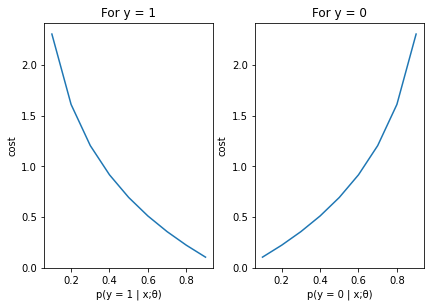

In [12]:
# distribution of cost w.r.t the predicted probability
plot_x = np.arange(0.1, 1.0, 0.1)
plot_y1 = -np.log(plot_x)
plot_y2 = -np.log(1 - plot_x)
fig, axes = plt.subplots(1, 2)
plt.tight_layout()
axes[0].plot(plot_x, plot_y1)
axes[0].set_title('For y = 1')
axes[0].set_xlabel('p(y = 1 | x;θ)')
axes[0].set_ylabel('cost')
axes[1].plot(plot_x, plot_y2)
axes[1].set_title('For y = 0')
axes[1].set_xlabel('p(y = 0 | x;θ)')
axes[1].set_ylabel('cost')
plt.show()

Finally we have the following cost function:  
$J(\theta) = - \frac{1}{m} \sum_{i=1}^m [y^i log(h_\theta(x^i)) + (1 - y^i)log(1 - h_\theta(x^i))]$  
Now our aim is to find a value of $\theta$ which minimizes the $J(\theta)$ for our given training data.  

As we discussed already that we used a dummy variable $x_0 = 1$ for all inputs in our model so let's go ahead and add that dummy variable to our data-set.  

In [13]:
# let's add dummy variable to our data-set
data_set['dummy'] = 1
# reset the columns
data_set = data_set[['dummy', 'featureA', 'featureB', 'category']]
# preview the data-set
data_set.head(2)

,dummy,featureA,featureB,category
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0


Now what's left is to estimate the $\theta$ that minimize the value of $J(\theta)$ for our given training model.  
We will use the following methods:  
1. gradient descent  
2. scipy  
3. sklearn

## Gradient Descent Method

As per the gradient descent method we start with random choice for $\theta$ and repeatedly performs the following task:  
Given $J(\theta) = - \frac{1}{m} \sum_{i=1}^m [y^i log(h_\theta(x^i)) + (1 - y^i)log(1 - h_\theta(x^i))]$  
$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)$  for all $j$ to reach to the optimum value for $\theta$

We observe that  
$\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^i) - y^i)x_j^i$

And therefore we can write  
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^i) - y^i)x_j^i$

A vectorized implementation is:  
$\theta := \theta - \alpha \frac{1}{m} X^T(g(X\theta) - \vec{y})$ where $g(z) = \frac{1}{1 + e^{-z}}$

In [104]:
# performs a single iteration of gradient descent
# required shapes => thetas:= (n + 1)x1, X:= mx(n + 1) and y:= mx1
def gradient_descent_iteration(alpha, thetas, X, y):
    # fetch the number of trainig samples
    m = len(y)
    # lambda for sigmoid function i.e. g(z) = 1 / (1 + e^-z)
    g = lambda z : 1 / (1 + np.exp(-z)) 
    # simultaneoulsy update theta_j
    X_theta = np.dot(X, thetas)
    g_X_theta = g(X_theta)
    thetas = thetas - alpha * (1 / m) * np.dot(X.T, g_X_theta - y)
    # return the updated values of thetas
    return thetas

As discussed above we the following cost function:  
$J(\theta) = - \frac{1}{m} \sum_{i=1}^m [y^i log(h_\theta(x^i)) + (1 - y^i)log(1 - h_\theta(x^i))]$  
A vectorized implementation is:  
$J(\theta) = -\frac{1}{m}[y^T.log(g(X\theta)) + (1 - y^T).log(1 - g(X\theta))]$

In [126]:
# computes the cost
# required shapes => thetas:= (n + 1)x1, X:= mx(n + 1) and y:= mx1
def compute_cost(thetas, X, y):
    # compute the number of samples
    m = len(y) 
    # lambda for sigmoid function i.e. g(z) = 1 / (1 + e^-z)
    g = lambda z : 1 / (1 + np.exp(-z)) 
    # compute intermediate terms
    y_T = y.T
    X_theta = np.dot(X, thetas)
    g_X_theta = g(X_theta)
    # compute the cost (1x1 matrix)
    cost = (-1 / m) * (np.dot(y_T, np.log(g_X_theta)) + np.dot((1 - y_T), np.log(1 - g_X_theta)))
    # return the singleton element of computed cost
    return cost[0][0]

Now we a function which can perform a single iteration of gradient-descent.  
Next we need to pick a learning rate $\alpha$ and then we will be good to go for the predictions.  

In [120]:
# let's separate the input and outputs
grad_x = data_set[['dummy', 'featureA', 'featureB']]
grad_y = data_set['category']
# preview the data-sets
print(grad_x.head(2))
print(grad_y.head(2))

   dummy   featureA   featureB
0      1  34.623660  78.024693
1      1  30.286711  43.894998
0    0
1    0
Name: category, dtype: int64


### Feature Scaling  
Next for the gradient descent method we need to scale our features to achieve the optimum faster.  

In [121]:
# scales the given features in X
def scale_features(X, features):
    # take a copy of X
    X = pd.DataFrame(X)
    # iterate through every feature
    for feature in features:
        # compute mean and std
        mu = X[feature].mean()
        std = X[feature].std()
        # scale features
        X[feature] = (X[feature] - mu)/std
    # return the X, mean, std
    return (X, mu, std)

# restores the scaling
def restore_scaling(X, features, mu, std):
    # iterate through every feature
    for feature in features:
        # normalize the feature
        X[feature] = (X[feature] * std + mu)


In [122]:
# scale input features
(grad_x, mu, std) = scale_features(grad_x, ['featureA', 'featureB'])
# preview the scaled values
print(grad_x.head())

   dummy  featureA  featureB
0      1 -1.594216  0.635141
1      1 -1.817101 -1.201489
2      1 -1.531325  0.359483
3      1 -0.280687  1.080923
4      1  0.688062  0.490905


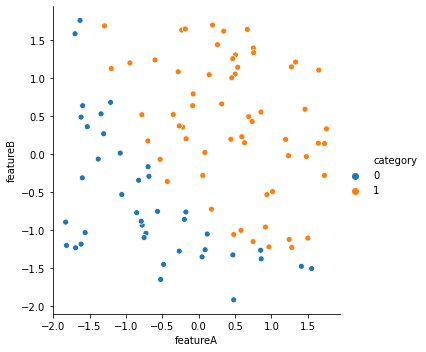

In [123]:
# look at the categorization of our data
scaled_grad_df = pd.concat([grad_x, grad_y], axis=1)
sns.relplot(x='featureA', y='featureB', data=scaled_grad_df, hue='category')

In [124]:
# split the data into training and testing
from sklearn.model_selection import train_test_split
grad_x_train, grad_x_test, grad_y_train, grad_y_test = train_test_split(grad_x, grad_y, test_size=0.2, random_state=101)
print(grad_x_train.shape)
print(grad_x_test.shape)

(80, 3)
(20, 3)


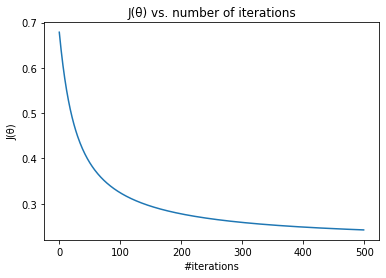

In [132]:
# let's make 100 iterations of gradient-descent for alpha = 0.1 and
# observe the convergence
alpha = 0.1
iterations = 500
costs = []
arr_y = np.array(grad_y_train).reshape(len(grad_y_train), 1)
# we start with theta to be zero vector
thetas = np.zeros(3).reshape(3,1) # three features so shape is (3x1)
for i in range(iterations):
    thetas = gradient_descent_iteration(alpha, thetas, grad_x_train, arr_y)
    cost = compute_cost(thetas, grad_x_train, arr_y)
    costs.append(cost)
# plot costs w.r.t number of iterations
plt.plot(range(iterations), costs)
plt.title("J(θ) vs. number of iterations")
plt.xlabel('#iterations')
plt.ylabel('J(θ)')
plt.show()

From the above plot we see that the gradient-descent method is working correctly however the choice of $\alpha$ is not that effective because gradient-descent is quite slow (taking around 500 iterations to converge).  
Let's try multiple values for $\alpha$ and let's pick the effective one!  

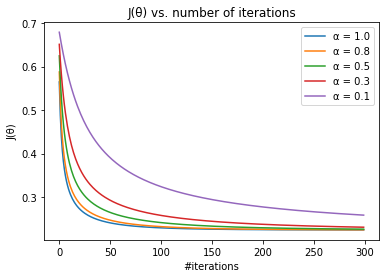

In [137]:
# require y to be (mx1) size
arr_y = np.array(grad_y_train).reshape(len(grad_y_train), 1)
# choices for alpha
alphas = [1.0, 0.8, 0.5, 0.3, 0.1]
# max. number of iterations for gradient-descent
iterations = 300
# iterate through every alpha
for alpha in alphas:
    costs = [] # stores the cost
    # we start with theta to be zero vector
    thetas = np.zeros(3).reshape(3,1) # three features so shape is (3x1)
    # apply iterations of gradient descent
    for i in range(iterations):
        thetas = gradient_descent_iteration(alpha, thetas, grad_x_train, arr_y)
        cost = compute_cost(thetas, grad_x_train, arr_y)
        costs.append(cost)
    # plot costs w.r.t number of iterations
    plt.plot(range(iterations), costs, label="α = {}".format(alpha))
# configure plot
plt.title("J(θ) vs. number of iterations")
plt.xlabel('#iterations')
plt.ylabel('J(θ)')
plt.legend()
plt.show()

From the above plot we conclude that $\alpha = 0.5$ is an effective choice.  

In [138]:
# train the model with learning-rate of 0.5
alpha = 0.5
# we start with theta to be zero vector
thetas = np.zeros(3).reshape(3,1) # three features so shape is (3x1)
# max. number of iterations
iterations = 300
# make iterations
for i in range(iterations):
    thetas = gradient_descent_iteration(alpha, thetas, grad_x_train, arr_y)
# preview the parameters
print(thetas)

[[1.37667792]
 [3.25848863]
 [2.95611438]]


In [142]:
# generate the equation
equation = "Pr(y = 1 | x; θ) = {:.2f} + {:.2f}xfeatureA + {:.2f}xfeatureB".format(thetas[0, 0], thetas[1, 0], thetas[2, 0])
print(equation)

Pr(y = 1 | x; θ) = 1.38 + 3.26xfeatureA + 2.96xfeatureB


Now we have the following boundary line:  
$1.38 + 3.26 x_1 + 2.96 x_2 \ge 0 \implies $ predict category 1  
Or we can say that $3.26 x_1 + 2.96 x_2 = -1.38$ is the boundary decision line

Text(0.5, 1.0, 'Decision boundary for classification')

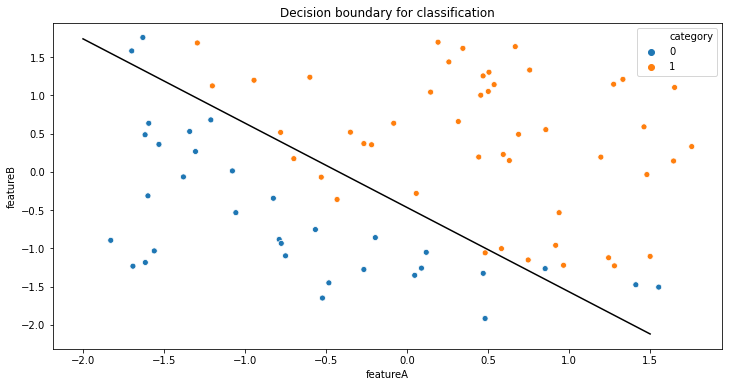

In [152]:
theta_0 = thetas[0, 0]
theta_1 = thetas[1, 0]
theta_2 = thetas[2, 0]
x_axis = np.arange(-2.0, +2.0, 0.5)
y_axis = (-theta_0 - theta_1 * x_axis)/theta_2
fig, ax = plt.subplots(figsize=(12, 6))
# plot the actual training data
sns.scatterplot(x='featureA', y='featureB', data=pd.concat([grad_x_train, grad_y_train], axis=1), ax=ax, hue='category')
# plot the boundary decision line
plt.plot(x_axis, y_axis, color='black')
# configure plot
plt.title('Decision boundary for classification')

In [176]:
# now we make predictions on the test-data
g = lambda z : 1 / (1 + np.exp(-z)) # sigmoid function
# compute the probabilities
probs = g(np.dot(grad_x_test, thetas))
probs = probs.reshape(len(probs))
# categorizes
classify = lambda x : 0 if x < 0.5 else 1
# make predictions
predictions = []
for prob in probs:
    predictions.append(classify(prob))
# preview predictions
print(predictions)
# preview actual values
actuals = grad_y_test.to_numpy()
print(actuals)

[0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1]
[1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1]


In [179]:
# generate classification reports and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(actuals, predictions))
print("")
print(confusion_matrix(actuals, predictions))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.92      0.92      0.92        13

    accuracy                           0.90        20
   macro avg       0.89      0.89      0.89        20
weighted avg       0.90      0.90      0.90        20


[[ 6  1]
 [ 1 12]]


Our gradient-descent model seems to be a good fit for our data-set.  
We have 18 correct predictions and 2 mis-predictions.  

## scipy.optimize.minimize  
Typically we use more-shopisticated in-built functions from the library instead of writing our own. We implemented the gradient-descent for explanation purposes.  
We could have also used scipy.optimize.minimize for finding the optimal value for $\theta$ based on our data-set.  

## sklearn.linear_model.LogisticRegression

In [232]:
# preview the data-set
data_set.head()

,dummy,featureA,featureB,category
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [233]:
# let's separate out the input and output
x = data_set[['dummy', 'featureA', 'featureB']]
y = data_set['category']
# preview the data
print(x.head())
print(y.head())

   dummy   featureA   featureB
0      1  34.623660  78.024693
1      1  30.286711  43.894998
2      1  35.847409  72.902198
3      1  60.182599  86.308552
4      1  79.032736  75.344376
0    0
1    0
2    0
3    1
4    1
Name: category, dtype: int64


In [234]:
# let's split the data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
print(x_train.shape)
print(x_test.shape)

(80, 3)
(20, 3)


In [236]:
# create a logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# train the model
model.fit(x_train, y_train)

LogisticRegression()

In [237]:
# make predictions
predictions = model.predict(x_test)

In [238]:
# generate classification reports and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print("")
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.92      0.92      0.92        13

    accuracy                           0.90        20
   macro avg       0.89      0.89      0.89        20
weighted avg       0.90      0.90      0.90        20


[[ 6  1]
 [ 1 12]]


We see that our gradient-descent and sklearn's LogisticRegression performs the same on the given data-set!  

## Takeaway
1. Logistic Regression theory i.e. hypothesis function & cost-function  
2. Gradient descent, feature scaling, learning-rate-choice, decision-boundary-line visualization  
3. Classification-report and confusion-matrix  
4. sklearn's inbuilt logistic regression  


# Thank You!